In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
df = pd.read_pickle("./pickles/dataframe.store_model_performance.pickle")
df.sort_values("name", inplace=True)

In [3]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(df)

,name,R2_score,mean_absolute_error,avarage_predication_time,parameters
0,KNeighborsRegressor,0.078090,457.589509,0.007060,{'n_neighbors': 10}
2,KNeighborsRegressor-grid-searched,0.108780,461.259329,0.008352,{'n_neighbors': 101}
1,RandomForestRegressor,0.170053,387.308306,0.018507,"{'n_estimators': 25, 'criterion': 'absolute_er..."
4,grid-searched-2,0.097501,337.280298,0.058183,"{'batch_size': 10, 'first_activation': 'tanh',..."
5,randomized-searched-3-hidden-layers,0.086073,341.057990,0.031537,"{'n_nodes_3': 126, 'n_nodes_2': 63, 'n_nodes_1..."
3,sequential,0.081812,328.495436,0.031749,"{'layers': [('Dense', 64, 'tanh'), ('Dense', 6..."


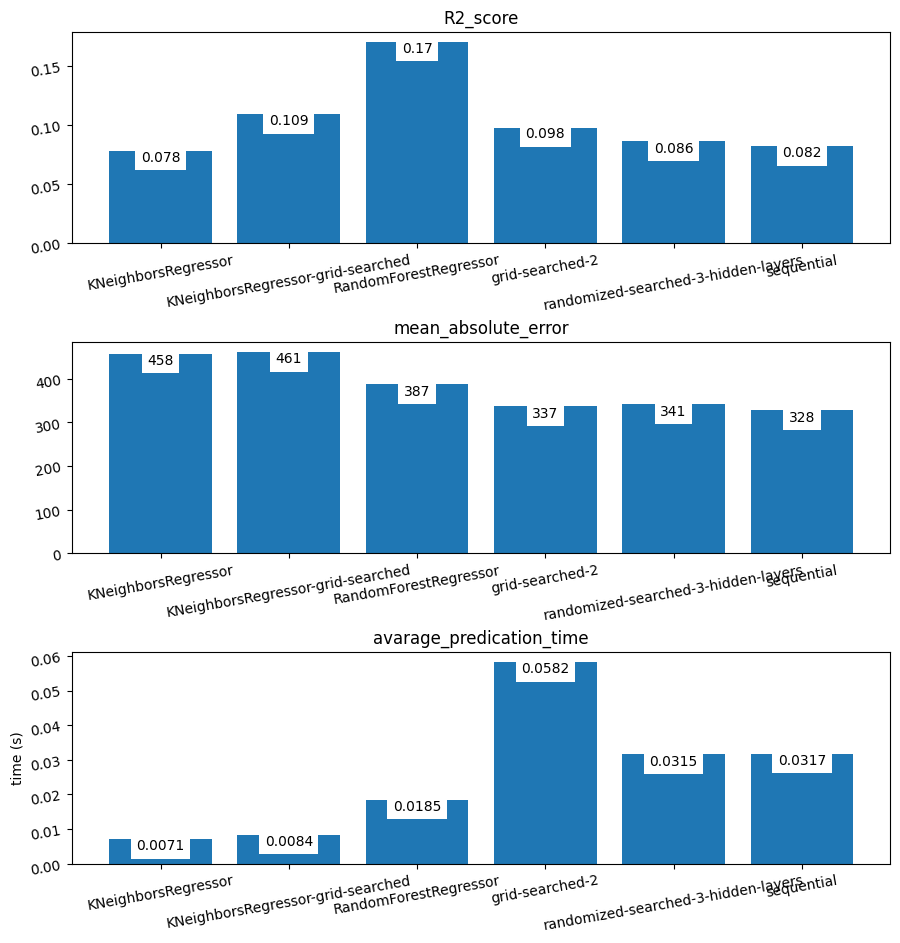

In [7]:
def add_value_to_bar_plot(ax, s):
    for i, v in enumerate(s):
        ax.text(i, v, v, ha='center', va="top",  bbox=dict(facecolor='white', alpha=1, edgecolor='None'))

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 10))
fig.tight_layout(pad=5)

axes[0].tick_params(rotation=10)
axes[0].bar(df["name"], df["R2_score"])
axes[0].set_title("R2_score")
add_value_to_bar_plot(axes[0], np.round(df["R2_score"], 3))
# axes[0].set_ylim(0, 1)

# ---

axes[1].tick_params(rotation=10)
axes[1].bar(df["name"], df["mean_absolute_error"])
axes[1].set_title("mean_absolute_error")
add_value_to_bar_plot(axes[1], np.round(df["mean_absolute_error"], 0).astype(int))

# ---

axes[2].tick_params(rotation=10)
axes[2].bar(df["name"], df["avarage_predication_time"])
axes[2].set_title("avarage_predication_time")
axes[2].set_ylabel("time (s)")
add_value_to_bar_plot(axes[2], np.round(df["avarage_predication_time"], 4))